On importe les dépendances

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import random as rd
import math

Définition des paramètres de la simulation

In [17]:
A=0
B=500
N=101 #nombre de points de discrétisation

Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization= discretization_indexes*Delta

mu=-5
a=50
sigma2=12

observation_indexes=[0,20,40,60,80,100]
depth=np.array([0,-4,-12.8,-1,-6.5,0])

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

n=len(unknown_indexes)

In [4]:
#question 1 :
def cov(d,a,sigma2): #permet de créer la matrice de covariance à partir d'une matrice de distance
    return sigma2*np.exp(-abs(d)/a)

In [5]:
#question 2 :
D=np.array([[abs(i-j)*Delta for j in discretization_indexes] for i in discretization_indexes])

In [ ]:
#question 3 : 
Z=cov(D,a,sigma2)

In [10]:
# question 4 :

# Matrice de covariance entre les observations
D_observation=np.array([[abs(i-j)*Delta for j in observation_indexes] for i in observation_indexes])
Z_observation=cov(D_observation,a,sigma2)

# Matrice de covariance entre les observations et les inconnues
D_observation_unknown=np.array([[abs(i-j)*Delta for j in unknown_indexes] for i in observation_indexes])
Z_observation_unknown=cov(D_observation_unknown,a,sigma2)

# Matrice de covariance entre les inconnues
D_unknown=np.array([[abs(i-j)*Delta for j in unknown_indexes] for i in unknown_indexes])
Z_unknown=cov(D_unknown,a,sigma2)

Question 5 :
On commence par créer un générateur de nombre suivant une loi normale centrée réduite par la méthode de Box-Muller.

In [19]:
def normale(): 
    x=rd.random()
    y=rd.random()
    return math.sqrt(-math.log(x))*math.cos(2*math.pi*y)

def vnormale(n):#renvoie un vecteur contenant n loi centrées réduites
    return np.array([normale() for i in range (n)])


On note $Y$ la variable qui représente les profondeurs inconnues et $Z$ celles des profondeurs obervées.
$Z_c$ est le vecteur des observations.

$Y_{|Z=Z_c}$ suit une loi normale d'esperance $µ+C_{Y,Z}C_Z^{-1}(Z_c - µ)$ et de matrice de covariance $CS_Y=C_Y − C_{Y,Z}C_Z^{−1}C_{Z,Y}$ où $C_Y$,$C_Z$ et $C_{Z,Y}$ sont respectivement les matrices de covariances pour les inconnues, les observations et entre observations et inconnues.

On simule $Y$ sachant $Z=Z_c$ en simulant une loi normale centrée réduite grâce à la question précédente. On la transforme alors en loi normale ayant les bons paramètres. Pour cela il faut prendre la décomposition de Cholesky de la matrice de covariance que l'on appelle $R$.

In [49]:
R=np.linalg.cholesky(Z_unknown - np.dot(np.dot(np.transpose(Z_observation_unknown),np.linalg.inv(Z_observation)),Z_observation_unknown))
vmu_u=np.array([mu for i in range(n)])
vmu_o=np.array([mu for i in range(len(observation_indexes))])
vesp=vmu_u+np.dot(np.dot(np.transpose(Z_observation_unknown),np.linalg.inv(Z_observation)),depth-vmu_o)


In [53]:
def var(): #retourne un vecteur qui suit la loi Y sachant Z=Zc
    return vesp + np.dot(R,vnormale(n))

On veut estimer l'espérance de profondeurs inconnues en sachant les profondeurs observées. 
L'espérance s'estime à partir de moyennes pour plusieures simulations.

In [39]:
def esperance(m=1): #renvoie une estimation de l'esperance de par la moyenne de m simulations
    S=np.zeros(n)
    for i in range(m):
        S=S+var()
    return S/m

On représente maintenant les résultats de la simulation.

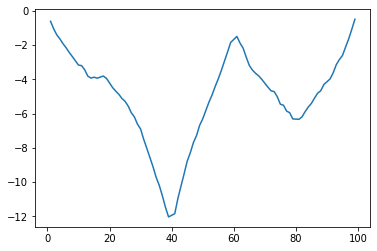

In [54]:
#affichage
def affichage(m):
    plt.plot(unknown_indexes,esperance(m))
    plt.show()
    
affichage(100)